In [29]:
"""

"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

cols = ['ID', 'Age', 'Experience', 'Income', 'ZIP_Code', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard' ]
df = pd.read_csv('/Users/tamzi/OneDrive/UNI/6006CEM/Coursework/CSV_Files/Pro_Bank_Personal_Loan_Modelling.csv', names = cols)


#convert all object to numeric values
#ndf = pd.to_numeric(df)
cols = df.columns[df.dtypes.eq('object')]
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')

df = df.iloc[1:]
print(df.head())
#df.isnull().values.any()
#df.duplicated().sum()
#df.nunique()


    ID   Age  Experience  Income  ZIP_Code  Family  CCAvg  Education  \
1  1.0  25.0         1.0    49.0   91107.0     4.0    1.6        1.0   
2  2.0  45.0        19.0    34.0   90089.0     3.0    1.5        1.0   
3  3.0  39.0        15.0    11.0   94720.0     1.0    1.0        1.0   
4  4.0  35.0         9.0   100.0   94112.0     1.0    2.7        2.0   
5  5.0  35.0         8.0    45.0   91330.0     4.0    1.0        2.0   

   Mortgage  Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
1       0.0            0.0                 1.0         0.0     0.0         0.0  
2       0.0            0.0                 1.0         0.0     0.0         0.0  
3       0.0            0.0                 0.0         0.0     0.0         0.0  
4       0.0            0.0                 0.0         0.0     0.0         0.0  
5       0.0            0.0                 0.0         0.0     0.0         1.0  


In [30]:
#select numerical features

num_feat = df[['Age', 'Experience', 'Income', 'ZIP_Code', 'Family', 'CCAvg', 'Education', 'Mortgage','Personal_Loan' ]]

correlation_matrix = num_feat.corr()
print("Correlation Matrix")
print(correlation_matrix)

Correlation Matrix
                    Age  Experience    Income  ZIP_Code    Family     CCAvg  \
Age            1.000000    0.994215 -0.055269 -0.029216 -0.046418 -0.052012   
Experience     0.994215    1.000000 -0.046574 -0.028626 -0.052563 -0.050077   
Income        -0.055269   -0.046574  1.000000 -0.016410 -0.157501  0.645984   
ZIP_Code      -0.029216   -0.028626 -0.016410  1.000000  0.011778 -0.004061   
Family        -0.046418   -0.052563 -0.157501  0.011778  1.000000 -0.109275   
CCAvg         -0.052012   -0.050077  0.645984 -0.004061 -0.109275  1.000000   
Education      0.041334    0.013152 -0.187524 -0.017377  0.064929 -0.136124   
Mortgage      -0.012539   -0.010582  0.206806  0.007383 -0.020445  0.109905   
Personal_Loan -0.007726   -0.007413  0.502462  0.000107  0.061367  0.366889   

               Education  Mortgage  Personal_Loan  
Age             0.041334 -0.012539      -0.007726  
Experience      0.013152 -0.010582      -0.007413  
Income         -0.187524  0.206806

<function matplotlib.pyplot.show>

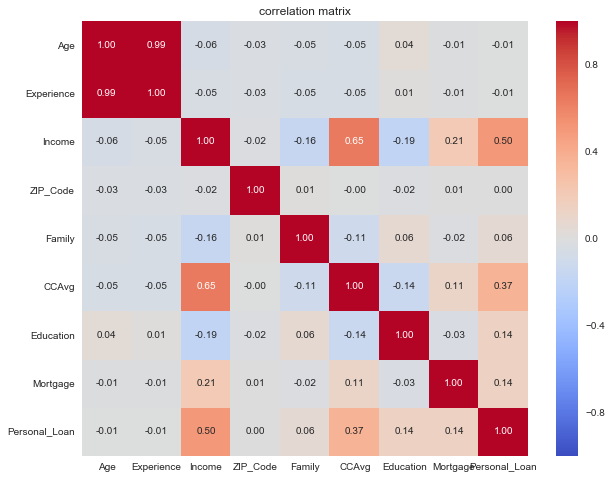

In [8]:
#use heatmap to display matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot = True, cmap="coolwarm", fmt=".2f")
plt.title("correlation matrix")
plt.show

In [31]:
#select x and y values
#y is target
#x everything else

x = df[['Age', 'Experience', 'Income',  'CCAvg', 'Education', 'Mortgage' ]]
y = df[['Personal_Loan']]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)

print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (3750, 6)
y_train shape: (3750, 1)
x_test shape: (1250, 6)
y_test shape: (1250, 1)


In [32]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors=50)
model.fit(x_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=50, p=2,
          weights='uniform')

In [33]:
from sklearn.metrics import mean_squared_error, r2_score
#making predictions on testing set
y_train_pre = model.predict(x_train)
y_test_pre = model.predict(x_test)

#eval model
m_sqr_err = mean_squared_error(y_train, y_train_pre)
rmse = np.sqrt(m_sqr_err)
r2 = r2_score(y_test, y_test_pre)


train_score = model.score(x_train, y_train)
test_score = model.score(x_test, y_test)

print("Evaluation of Model")
print("Training")
print('RMSE is: {:.3f}'.format(rmse))
print("R^2 score: {:.3f}".format(r2))
#print("Mean Squared Error: {:.3f}".format(m_sqr_err))
print("Model Training score: {:.3f}".format(train_score))

rmse =np.sqrt(mean_squared_error(y_test, y_test_pre))
r2 = r2_score(y_test, y_test_pre)
print("Testing")
print('RMSE is: {:.3f}'.format(rmse))
print("R^2 score: {:.3f}".format(r2))
print("Model Testing Score: {:.3f}".format(test_score))

Evaluation of Model
Training
RMSE is: 0.246
R^2 score: 0.287
Model Training score: 0.321
Testing
RMSE is: 0.237
R^2 score: 0.287
Model Testing Score: 0.287


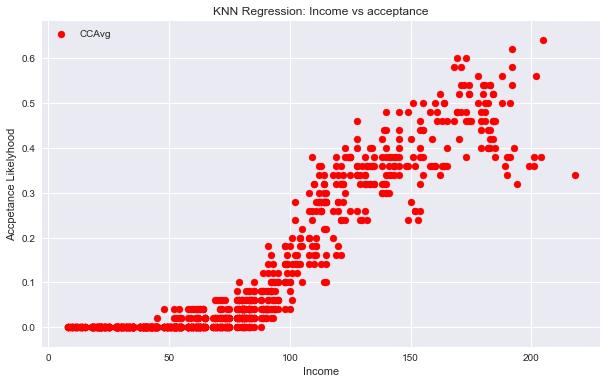

In [34]:
# shows the KNN regression line 
plt.figure(figsize=(10, 6))
#plt.scatter(x_test['Income'], y_test, color='blue', label='Acceptance threasholds')
plt.scatter(x_test['Income'], y_test_pre, color='red', label='CCAvg')
plt.title("KNN Regression: Income vs acceptance")
plt.xlabel("Income")
plt.ylabel("Accpetance Likelyhood")
plt.legend()
plt.show()